In [95]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [96]:
wildfire_data = pd.read_csv("fp-historical-wildfire-data-2006-2021.csv")

In [97]:
wildfire_data.head()

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,distance_from_water_source,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
0,2021,HWF053,NaN,5.50,C,59.522139,-119.926971,Provincial Land,Lightning,NaN,...,NaN,NaN,2021-06-28 22:26,0.01,2021-07-01 13:26,10.00,NaN,NaN,2021-07-01 13:44,5.50
1,2021,RWF005,NaN,0.01,A,52.692262,-116.118960,Provincial Land,Forest Industry,NaN,...,NaN,NaN,2021-03-30 14:30,0.01,2021-03-30 14:30,0.01,2021-03-30 14:35,0.01,2021-04-09 8:30,0.01
2,2021,LWF014,NaN,0.10,A,55.937050,-110.719950,Indian Reservation,Incendiary,NaN,...,NaN,NaN,2021-04-16 16:57,0.10,2021-04-16 16:57,0.10,NaN,NaN,2021-04-17 14:15,0.10
3,2021,MWF002,NaN,0.01,A,56.425933,-111.160750,Indian Reservation,Resident,NaN,...,NaN,NaN,2021-04-17 15:20,0.01,2021-04-17 15:20,0.01,NaN,NaN,2021-04-17 15:24,0.01
4,2021,EWF014,NaN,7.13,C,53.693450,-116.058633,Private Land,Resident,NaN,...,NaN,NaN,2021-04-01 19:10,7.13,2021-04-02 11:00,7.13,2021-04-02 15:52,7.13,2021-04-12 14:30,7.13


In [98]:
# First check the two columns assessment_datetime uc_fs_date to see if there are any NA values
wildfire_data['assessment_datetime'].isna().value_counts()

False    22914
Name: assessment_datetime, dtype: int64

In [99]:
wildfire_data['uc_fs_date'].isna().value_counts()

False    22914
Name: uc_fs_date, dtype: int64

In [100]:
# Since there are no null values in the two datetime columns we will calculate the difference between the two to
# determine the days the fire lasted for based on the initial assessment of the environment

# Convert both the columns to datetime
wildfire_data['assessment_datetime'] = pd.to_datetime(wildfire_data['assessment_datetime'])
wildfire_data['uc_fs_date'] = pd.to_datetime(wildfire_data['uc_fs_date'])

In [101]:
wildfire_data['date_diff_from_assessment'] = wildfire_data['uc_fs_date'] - wildfire_data['assessment_datetime']

In [102]:
wildfire_data['day_diff_from_assessment'] = wildfire_data['date_diff_from_assessment'].dt.days

In [103]:
# get the forest area from the fire_number field
def parse_forest_area(big_string, substrings):

    if not big_string:
        return np.nan
    else:
        if big_string[0] in substrings:
            return big_string[0]

In [104]:
forest_area_list = ['C', 'E', 'H', 'G', 'L', 'M', 'P', 'R', 'S', 'W']
wildfire_data['forest_area'] = wildfire_data['fire_number'].map(lambda x: parse_forest_area(str(x), forest_area_list)).fillna('No Area')

In [105]:
# filtering the data and only keeping the columns that are required for the analysis
filtered_wildfire_data = wildfire_data.loc[:,['fire_year', 'forest_area',  'size_class', 'assessment_hectares', 'fire_origin', 'general_cause_desc', 'fire_spread_rate', 'fire_type', 'fire_position_on_slope', 'weather_conditions_over_fire', 'temperature', 'relative_humidity', 'wind_speed', 'day_diff_from_assessment']]

In [106]:
filtered_wildfire_data.head()

,fire_year,forest_area,size_class,assessment_hectares,fire_origin,general_cause_desc,fire_spread_rate,fire_type,fire_position_on_slope,weather_conditions_over_fire,temperature,relative_humidity,wind_speed,day_diff_from_assessment
0,2021,H,C,0.01,Provincial Land,Lightning,3.0,Surface,Flat,Clear,28.8,37.0,11.0,2
1,2021,R,A,0.01,Provincial Land,Forest Industry,0.0,Ground,Flat,Cloudy,2.0,50.0,10.0,0
2,2021,L,A,0.10,Indian Reservation,Incendiary,0.5,Surface,Flat,Clear,16.0,19.0,15.0,0
3,2021,M,A,0.01,Indian Reservation,Resident,0.0,Surface,Flat,Cloudy,7.0,55.0,14.0,0
4,2021,E,C,5.00,Private Land,Resident,5.0,Surface,Flat,Cloudy,12.8,19.0,27.0,0


In [107]:
filtered_wildfire_data['general_cause_desc'].value_counts()

Lightning               7873
Recreation              5239
Resident                3948
Incendiary              1995
Power Line Industry     1177
Undetermined             736
Agriculture Industry     497
Forest Industry          417
Oil & Gas Industry       409
Other Industry           295
Railroad                 126
Government               116
Restart                   65
Prescribed Fire           19
Under Investigation        2
Name: general_cause_desc, dtype: int64

In [108]:
# Can remove the Under Investigation Class as that is not going to be a factor in deteremining size class
filtered_wildfire_data = filtered_wildfire_data.loc[filtered_wildfire_data['general_cause_desc'] != 'Under Investigation']

In [109]:
filtered_wildfire_data['general_cause_desc'].value_counts()

Lightning               7873
Recreation              5239
Resident                3948
Incendiary              1995
Power Line Industry     1177
Undetermined             736
Agriculture Industry     497
Forest Industry          417
Oil & Gas Industry       409
Other Industry           295
Railroad                 126
Government               116
Restart                   65
Prescribed Fire           19
Name: general_cause_desc, dtype: int64

<Axes: >

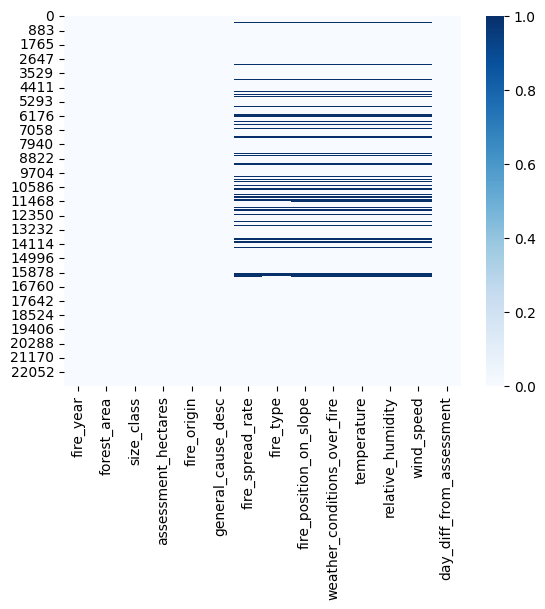

In [110]:
sns.heatmap(filtered_wildfire_data.isna(), cmap='Blues')

In [111]:
# find which columns have missinig values
filtered_wildfire_data.isna().sum()

fire_year                          0
forest_area                        0
size_class                         0
assessment_hectares                0
fire_origin                        9
general_cause_desc                 0
fire_spread_rate                2609
fire_type                       2477
fire_position_on_slope          2649
weather_conditions_over_fire    2656
temperature                     2657
relative_humidity               2659
wind_speed                      2660
day_diff_from_assessment           0
dtype: int64

In [112]:
# We can begin by dealing with rows of fire_origin
filtered_wildfire_data['fire_origin'].value_counts()

Provincial Land       16343
Private Land           3197
Indian Reservation     2883
Provincial Park         242
Metis Settlement        139
DND                      97
National Park             2
Name: fire_origin, dtype: int64

In [113]:
# print("MIN",filtered_wildfire_data.loc[filtered_wildfire_data['fire_origin'].isna(),:]['assessment_datetime'].min())
# print("MAX",filtered_wildfire_data.loc[filtered_wildfire_data['fire_origin'].isna(),:]['assessment_datetime'].max())

In [114]:
# # Since the values are old and there are very few of them they can be removed from the dataset
# filtered_wildfire_data.drop(filtered_wildfire_data.loc[filtered_wildfire_data['fire_origin'].isna()].index, axis = 0,inplace = True)

In [115]:
# filtered_wildfire_data.reset_index(inplace = True)

In [116]:
filtered_wildfire_data.isna().sum()

fire_year                          0
forest_area                        0
size_class                         0
assessment_hectares                0
fire_origin                        9
general_cause_desc                 0
fire_spread_rate                2609
fire_type                       2477
fire_position_on_slope          2649
weather_conditions_over_fire    2656
temperature                     2657
relative_humidity               2659
wind_speed                      2660
day_diff_from_assessment           0
dtype: int64

In [117]:
filtered_wildfire_data[filtered_wildfire_data['fire_spread_rate'].isna()]

,fire_year,forest_area,size_class,assessment_hectares,fire_origin,general_cause_desc,fire_spread_rate,fire_type,fire_position_on_slope,weather_conditions_over_fire,temperature,relative_humidity,wind_speed,day_diff_from_assessment
120,2021,C,A,0.01,Provincial Land,Recreation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
317,2021,C,A,0.01,Provincial Land,Recreation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
321,2021,W,A,0.01,Provincial Land,Recreation,NaN,Surface,NaN,NaN,NaN,NaN,NaN,0
326,2021,C,A,0.01,Provincial Land,Recreation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
327,2021,C,A,0.01,Provincial Land,Recreation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16183,2010,E,A,0.01,Provincial Land,Recreation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16184,2010,E,A,0.01,Provincial Land,Recreation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16185,2010,E,A,0.01,Provincial Land,Recreation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16187,2010,R,A,0.01,Provincial Land,Recreation,NaN,Ground,NaN,NaN,NaN,NaN,NaN,0


In [118]:
# get all columns have null values
na_cols_truths = filtered_wildfire_data.isna().sum() > 0
na_cols = list(filtered_wildfire_data.columns[na_cols_truths])
print(na_cols)

['fire_origin', 'fire_spread_rate', 'fire_type', 'fire_position_on_slope', 'weather_conditions_over_fire', 'temperature', 'relative_humidity', 'wind_speed']


In [119]:
# filter out the nulls from the columns
for col in na_cols:
  filtered_wildfire_data = filtered_wildfire_data.loc[~filtered_wildfire_data.isna()[col],:]

In [120]:
filtered_wildfire_data.isna().sum()

fire_year                       0
forest_area                     0
size_class                      0
assessment_hectares             0
fire_origin                     0
general_cause_desc              0
fire_spread_rate                0
fire_type                       0
fire_position_on_slope          0
weather_conditions_over_fire    0
temperature                     0
relative_humidity               0
wind_speed                      0
day_diff_from_assessment        0
dtype: int64

In [121]:
filtered_wildfire_data.columns

Index(['fire_year', 'forest_area', 'size_class', 'assessment_hectares',
       'fire_origin', 'general_cause_desc', 'fire_spread_rate', 'fire_type',
       'fire_position_on_slope', 'weather_conditions_over_fire', 'temperature',
       'relative_humidity', 'wind_speed', 'day_diff_from_assessment'],
      dtype='object')

In [122]:
filtered_wildfire_data.head()

,fire_year,forest_area,size_class,assessment_hectares,fire_origin,general_cause_desc,fire_spread_rate,fire_type,fire_position_on_slope,weather_conditions_over_fire,temperature,relative_humidity,wind_speed,day_diff_from_assessment
0,2021,H,C,0.01,Provincial Land,Lightning,3.0,Surface,Flat,Clear,28.8,37.0,11.0,2
1,2021,R,A,0.01,Provincial Land,Forest Industry,0.0,Ground,Flat,Cloudy,2.0,50.0,10.0,0
2,2021,L,A,0.10,Indian Reservation,Incendiary,0.5,Surface,Flat,Clear,16.0,19.0,15.0,0
3,2021,M,A,0.01,Indian Reservation,Resident,0.0,Surface,Flat,Cloudy,7.0,55.0,14.0,0
4,2021,E,C,5.00,Private Land,Resident,5.0,Surface,Flat,Cloudy,12.8,19.0,27.0,0


In [123]:
filtered_wildfire_data['fire_type'].value_counts()

Surface       14820
Ground         4494
Crown           913
   Surface        1
Name: fire_type, dtype: int64

In [124]:
# Need to Clean the fire_type column by removing any space before
filtered_wildfire_data['fire_type'] = filtered_wildfire_data['fire_type'].apply(lambda name:name.strip())

In [125]:
filtered_wildfire_data['fire_type'].value_counts()

Surface    14821
Ground      4494
Crown        913
Name: fire_type, dtype: int64

(array([3293., 1712., 3265., 1013., 2021., 1163., 2843., 1022., 2042.,
        1854.]),
 array([2006. , 2007.5, 2009. , 2010.5, 2012. , 2013.5, 2015. , 2016.5,
        2018. , 2019.5, 2021. ]),
 <BarContainer object of 10 artists>)

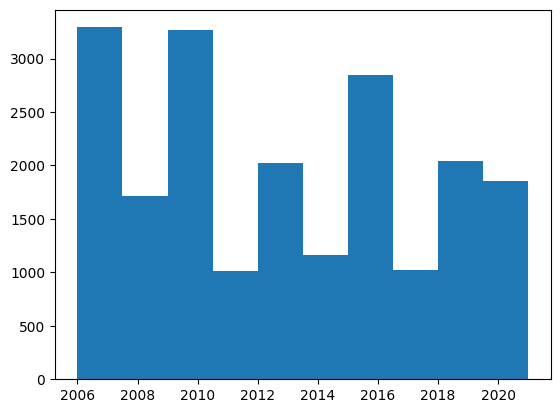

In [126]:
plt.hist(filtered_wildfire_data['fire_year'])

In [127]:
filtered_wildfire_data.dtypes

fire_year                         int64
forest_area                      object
size_class                       object
assessment_hectares             float64
fire_origin                      object
general_cause_desc               object
fire_spread_rate                float64
fire_type                        object
fire_position_on_slope           object
weather_conditions_over_fire     object
temperature                     float64
relative_humidity               float64
wind_speed                      float64
day_diff_from_assessment          int64
dtype: object

In [128]:
# Since this is the output variable not a predictor we can just use Label Encoder
filtered_wildfire_data.size_class.value_counts()

A    12722
B     5823
C     1058
E      324
D      301
Name: size_class, dtype: int64

In [129]:
filtered_wildfire_data.forest_area.value_counts()

H    3361
S    3022
L    2659
P    1973
C    1746
E    1721
M    1687
R    1538
G    1454
W    1067
Name: forest_area, dtype: int64

In [130]:
filtered_wildfire_data.fire_origin.value_counts()

Provincial Land       13731
Private Land           3183
Indian Reservation     2882
Provincial Park         195
Metis Settlement        139
DND                      97
National Park             1
Name: fire_origin, dtype: int64

In [131]:
filtered_wildfire_data.general_cause_desc.value_counts()

Lightning               7864
Resident                3944
Recreation              2570
Incendiary              1995
Power Line Industry     1177
Undetermined             734
Agriculture Industry     497
Forest Industry          417
Oil & Gas Industry       409
Other Industry           295
Railroad                 126
Government               116
Restart                   65
Prescribed Fire           19
Name: general_cause_desc, dtype: int64

In [132]:
 filtered_wildfire_data.fire_type.value_counts()

Surface    14821
Ground      4494
Crown        913
Name: fire_type, dtype: int64

In [133]:
 filtered_wildfire_data.fire_position_on_slope .value_counts()

Flat          16509
Bottom         1261
Upper 1/3       953
Middle 1/3      822
Lower 1/3       683
Name: fire_position_on_slope, dtype: int64

In [134]:
filtered_wildfire_data.weather_conditions_over_fire.value_counts()

Clear          9356
Cloudy         7319
CB Wet         1394
CB Dry         1291
Rainshowers     868
Name: weather_conditions_over_fire, dtype: int64

In [135]:
# Drop the day_diff_from_assessment column from the model dataset as it will be used as output variable for the
# regression model created later
filtered_model_data = filtered_wildfire_data.drop(['day_diff_from_assessment'], axis = 1)

In [136]:
cat_list = list(filtered_model_data.dtypes[filtered_model_data.dtypes == 'object'].index)
cat_list.remove('size_class')
model_data = pd.get_dummies(filtered_model_data, columns=cat_list)


In [137]:
# using label encoder for the size class variable
label_encoder = LabelEncoder()

model_data['size_class']= label_encoder.fit_transform(model_data['size_class'])

model_data['size_class'].unique()

array([2, 0, 1, 4, 3])

In [138]:
# get only the numerical columns from the dataframe
cols = list(filtered_model_data.dtypes.index)
print(cols)

for elem in cat_list:
  if elem in cols:
    cols.remove(elem)

cols.remove('size_class')

for feature in cols:
    mean = model_data[feature].mean()
    std = model_data[feature].std()
    normalize_fn = lambda x: (x - mean) / std
    model_data[feature] = model_data[feature].apply(normalize_fn)

['fire_year', 'forest_area', 'size_class', 'assessment_hectares', 'fire_origin', 'general_cause_desc', 'fire_spread_rate', 'fire_type', 'fire_position_on_slope', 'weather_conditions_over_fire', 'temperature', 'relative_humidity', 'wind_speed']


In [139]:
model_data.head()

,fire_year,size_class,assessment_hectares,fire_spread_rate,temperature,relative_humidity,wind_speed,forest_area_C,forest_area_E,forest_area_G,...,fire_position_on_slope_Bottom,fire_position_on_slope_Flat,fire_position_on_slope_Lower 1/3,fire_position_on_slope_Middle 1/3,fire_position_on_slope_Upper 1/3,weather_conditions_over_fire_CB Dry,weather_conditions_over_fire_CB Wet,weather_conditions_over_fire_Clear,weather_conditions_over_fire_Cloudy,weather_conditions_over_fire_Rainshowers
0,1.804402,2,-0.037874,0.825622,1.452382,-0.450022,0.265092,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1.804402,0,-0.037874,-0.338335,-2.103814,0.243609,0.146824,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1.804402,0,-0.036468,-0.144342,-0.246100,-1.410435,0.738165,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1.804402,0,-0.037874,-0.338335,-1.440345,0.510390,0.619897,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1.804402,2,0.040099,1.601593,-0.670720,-1.410435,2.157383,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [140]:
import math
import random

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, precision_recall_curve
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings("ignore")

In [141]:
def calculate_metrics(y_test, y_pred):
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred,
                                                               average='macro')
    print(confusion_matrix(y_test, y_pred))

    # Print metrics
    print(f'\tAccuracy: {accuracy:.2f}')
    print(f'\tPrecision: {precision:.2f}')
    print(f'\tRecall: {recall:.2f}')
    print(f'\tF1 Score: {f1:.2f}')
    print()
    print()

    return accuracy, precision, recall, f1

In [142]:
def plot_precision_recall_curve(y_test, y_pred_prob, model_name, color):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, color=color, label=f'{model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="upper right")
    plt.show()

In [143]:
def plot_learning_curve(model, X, y, color_train='r', color_val='g',
                        cv=5, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color=color_train)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color=color_val)
    plt.plot(train_sizes, train_scores_mean, 'o-', color=color_train, label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color=color_val, label="Cross-validation score")
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.show()

In [144]:
def plot_cross_val_score(model, X_train, y_train):
    # Cross Validation Scores
    cross_val = cross_val_score(model, X_train, y_train, cv=5)
    colors = plt.cm.viridis(np.linspace(0, 1, 5))  # Get 5 color shades from the 'viridis' colormap
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, 6), cross_val, color=colors)
    plt.xlabel('Fold Number')
    plt.ylabel('Accuracy')
    plt.title('Cross Validation Score per Fold')
    plt.ylim(0.5, 1)  # Set y-axis limit
    plt.yticks(np.arange(0.5, 1.05, 0.05))  # Custom y-axis ticks
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better readability
    plt.show()

In [145]:
def plot_feature_importance(model, model_name, color='orange'):
    # Get feature importances
    importances = model.feature_importances_
    indices = np.argsort(importances)

    # Create the plot
    plt.figure(figsize=(10, 10))
    plt.title(f'Feature Importances in {model_name}')
    plt.barh(range(len(indices)), importances[indices], color=color, align='center')
    plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

In [146]:
# Initialize an empty DataFrame to store metrics
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Function to append metrics to the DataFrame
def append_metrics(model_name, accuracy, precision, recall, f1):
    metrics_df.loc[len(metrics_df)] = [model_name, accuracy, precision, recall, f1]

In [147]:
# splitting data into train/test

X = model_data.drop('size_class', axis = 1)
y = model_data.loc[:,'size_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [148]:
# # Pairplots of continuous variables
# g = sns.pairplot(X_train[["temperature", "relative_humidity", "wind_speed"]], kind="kde")
# g.map_offdiag(sns.kdeplot, fill=True, color='C0')
# plt.show()

In [149]:
# # Pairplots of continuous variables
# g = sns.pairplot(X_test[["temperature", "relative_humidity", "wind_speed"]], kind="kde")
# g.map_offdiag(sns.kdeplot, fill=True, color='C0')
# plt.show()

(array([10181.,     0.,  4664.,     0.,     0.,   838.,     0.,   239.,
            0.,   260.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

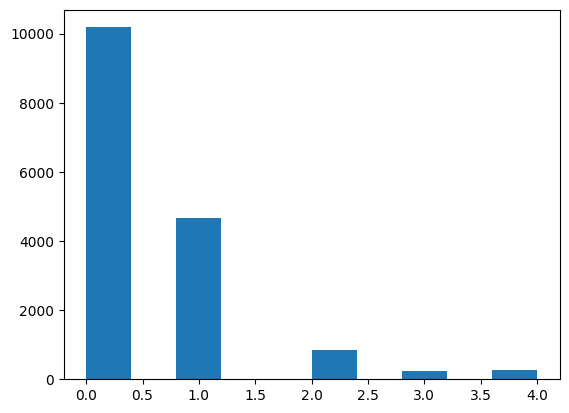

In [150]:
plt.hist(y_train)

(array([2541.,    0., 1159.,    0.,    0.,  220.,    0.,   62.,    0.,
          64.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

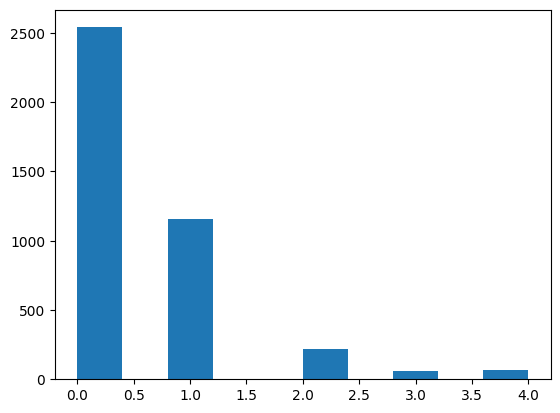

In [151]:
plt.hist(y_test)

Random Forest Metrics:
[[2463   77    0    1    0]
 [ 166  967   26    0    0]
 [  10  126   75    3    6]
 [   2   27   18    5   10]
 [   7   19   16    5   17]]
	Accuracy: 0.87
	Precision: 0.63
	Recall: 0.50
	F1 Score: 0.53





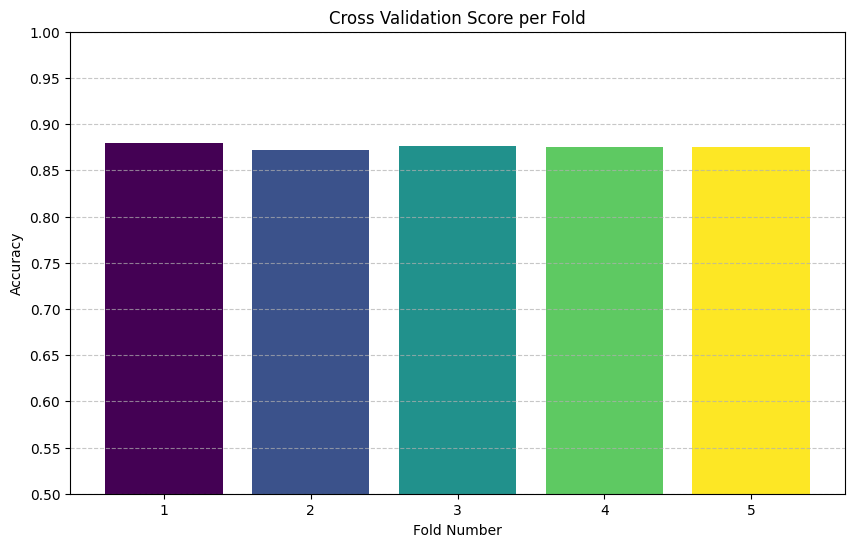

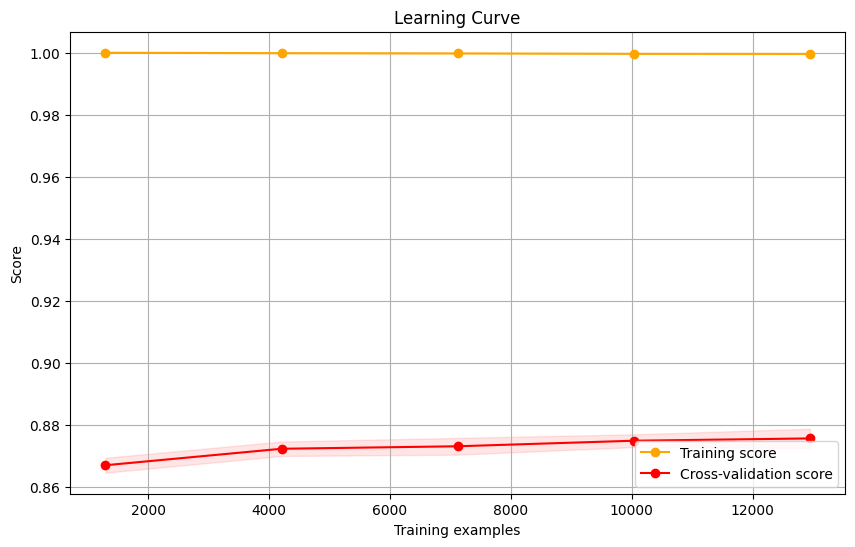

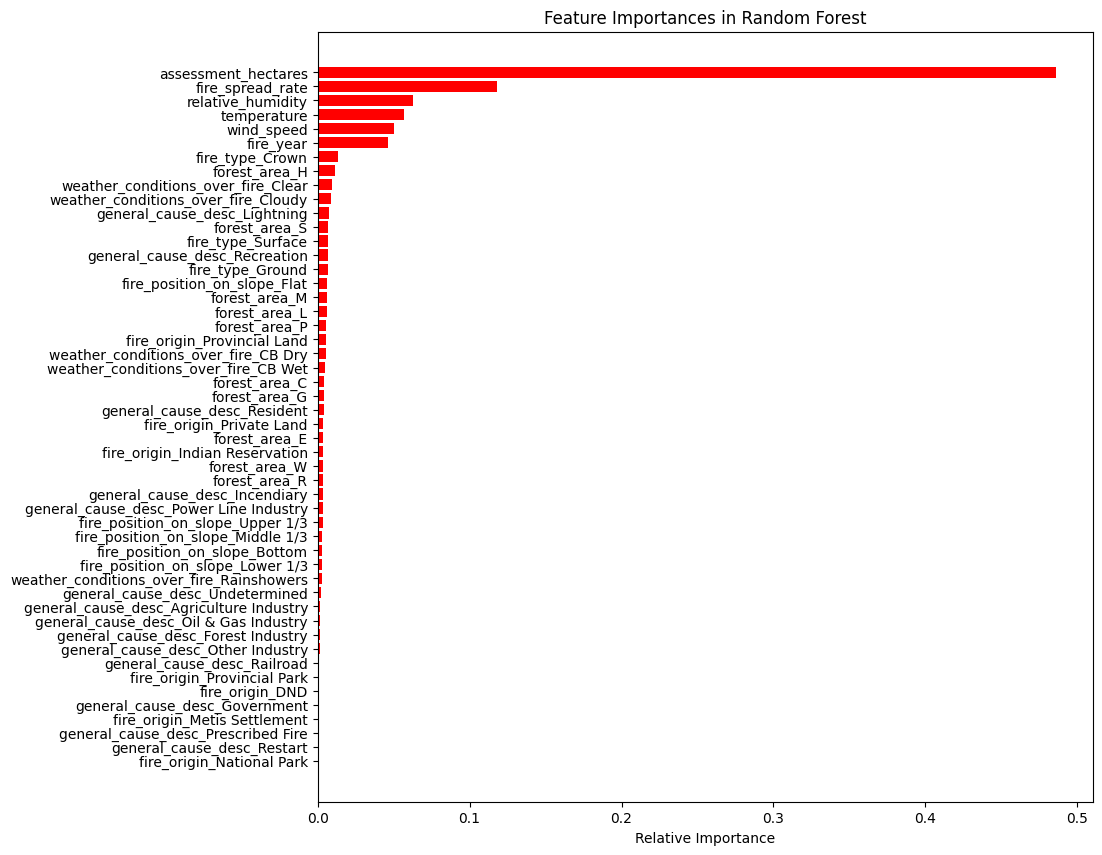

In [152]:
from sklearn.ensemble import RandomForestClassifier


model_name = 'Random Forest'

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]

print(f'{model_name} Metrics:')
accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred)
append_metrics(model_name, accuracy, precision, recall, f1)
# plot_precision_recall_curve(y_test, y_pred_prob, model_name, 'red')
print()
plot_cross_val_score(rf, X_train, y_train)
print()
plot_learning_curve(rf, X_train, y_train, color_train='orange', color_val='red')
plot_feature_importance(rf, model_name, 'red')

Random Forest Metrics:
[[2464   76    0    1    0]
 [ 166  971   22    0    0]
 [  11  121   79    3    6]
 [   2   27   18    3   12]
 [   7   22   14    6   15]]
	Accuracy: 0.87
	Precision: 0.60
	Recall: 0.49
	F1 Score: 0.52





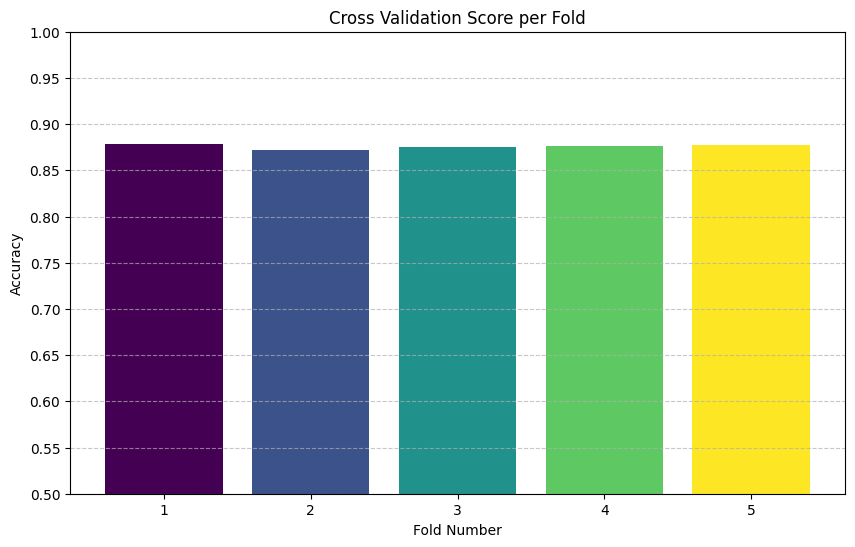

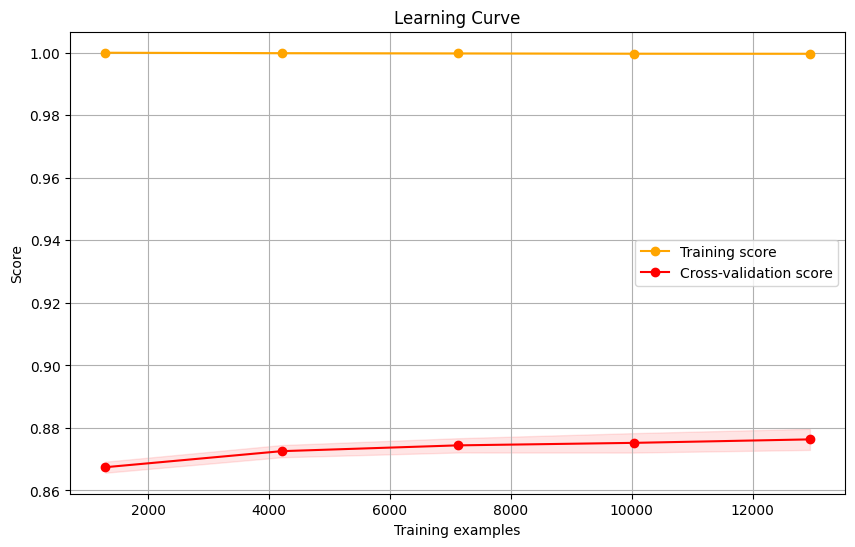

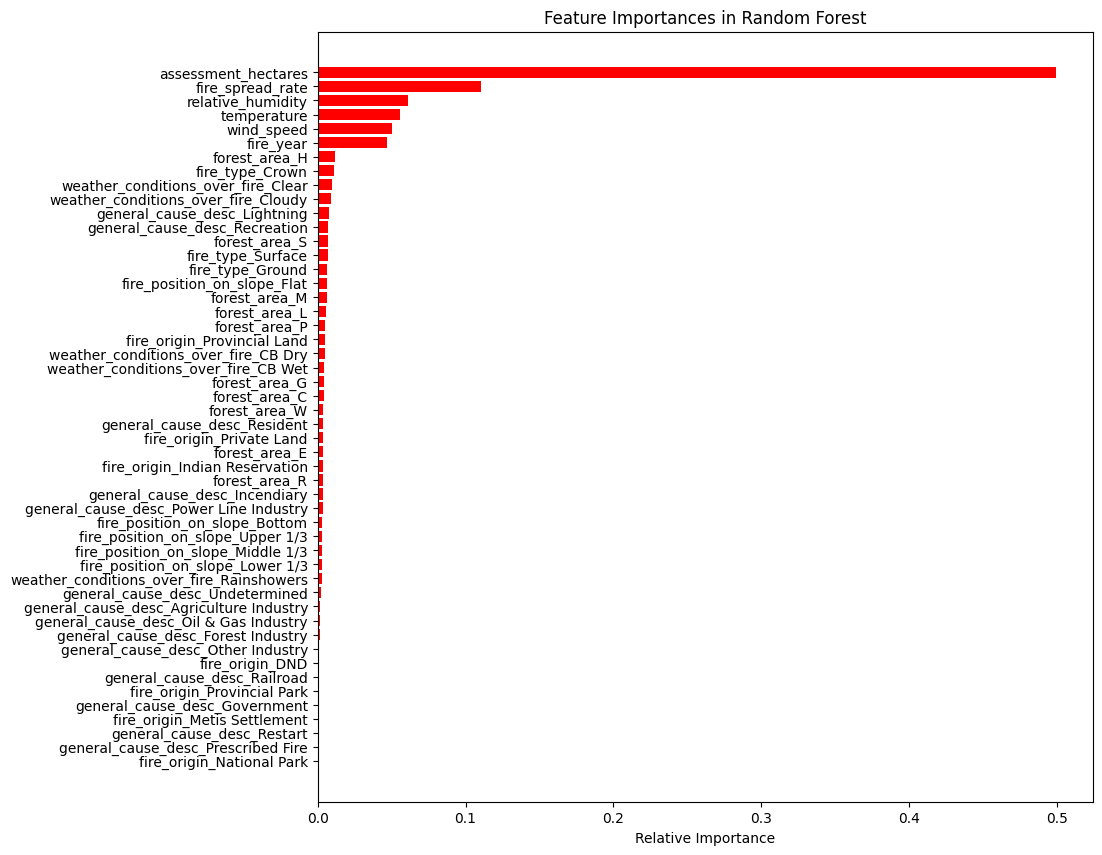

In [153]:
model_name = 'Random Forest'

rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]

print(f'{model_name} Metrics:')
accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred)
append_metrics(model_name, accuracy, precision, recall, f1)
# plot_precision_recall_curve(y_test, y_pred_prob, model_name, 'red')
print()
plot_cross_val_score(rf, X_train, y_train)
print()
plot_learning_curve(rf, X_train, y_train, color_train='orange', color_val='red')
plot_feature_importance(rf, model_name, 'red')

XGBoost Metrics:
[[2458   81    2    0    0]
 [ 158  957   41    0    3]
 [   9   99   93    8   11]
 [   1   18   19    9   15]
 [   6   11   20    4   23]]
	Accuracy: 0.87
	Precision: 0.63
	Recall: 0.54
	F1 Score: 0.57





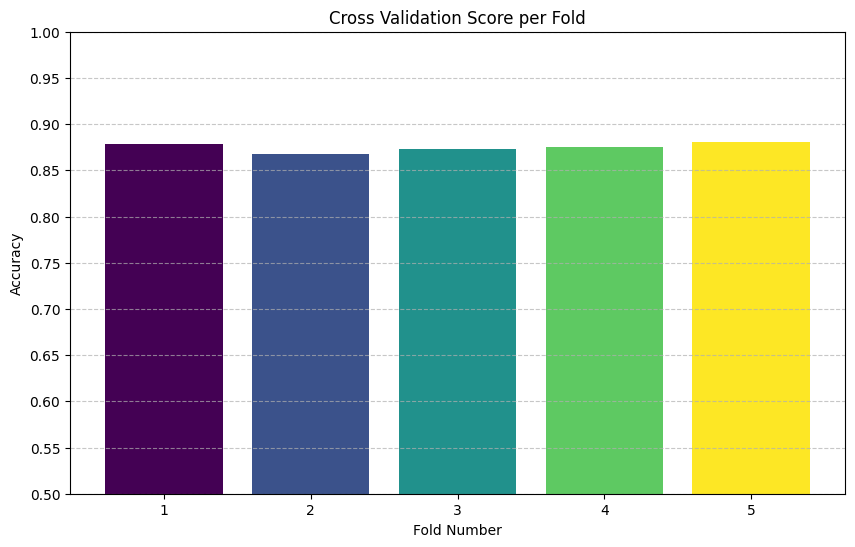

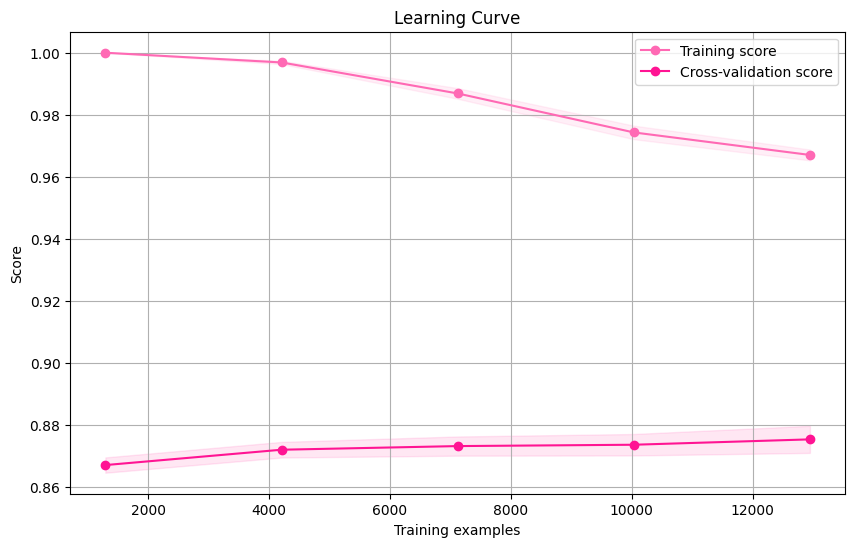

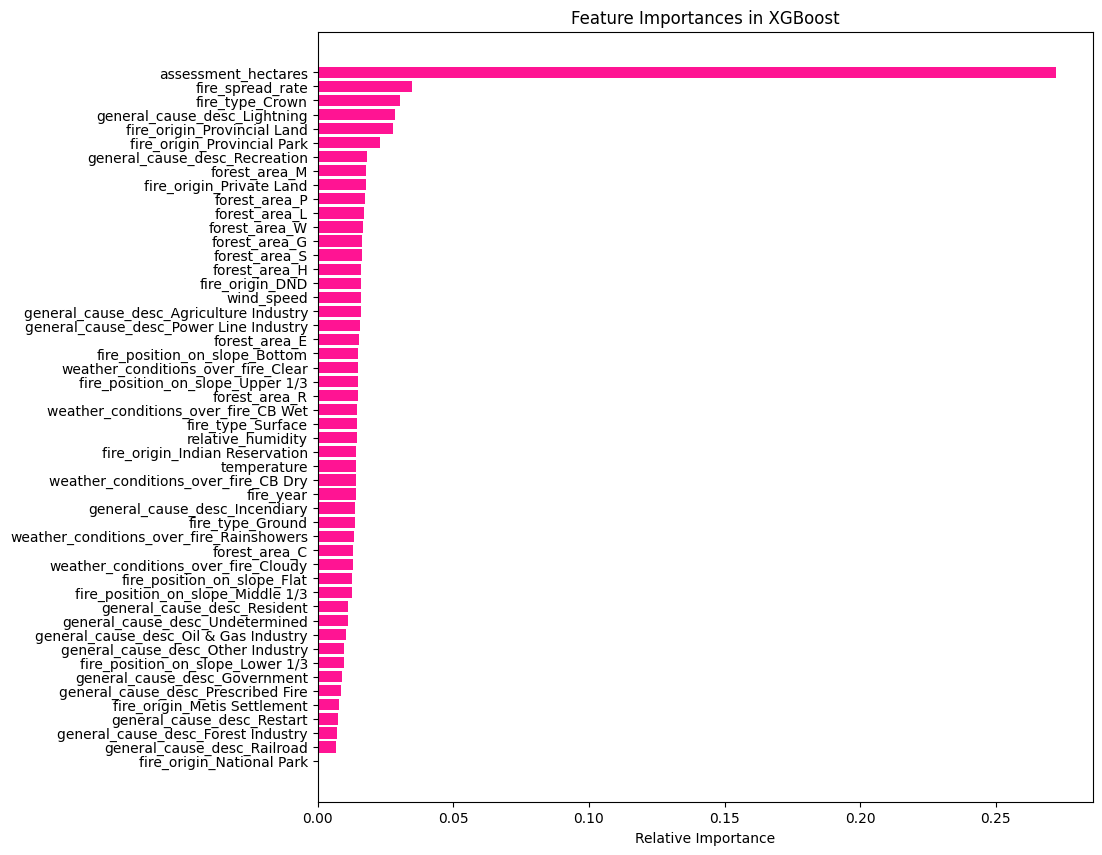

In [154]:
from xgboost import XGBClassifier


model_name = 'XGBoost'

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_pred_prob = xgb.predict_proba(X_test)[:, 1]

print(f'{model_name} Metrics:')
accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred)
append_metrics(model_name, accuracy, precision, recall, f1)
# plot_precision_recall_curve(y_test, y_pred_prob, model_name, 'deeppink')
print()
plot_cross_val_score(xgb, X_train, y_train)
print()
plot_learning_curve(xgb, X_train, y_train, color_train='hotpink', color_val='deeppink')
plot_feature_importance(xgb, model_name, 'deeppink')

XGBoost Metrics:
[[2451   87    2    1    0]
 [ 160  949   46    1    3]
 [   8  101   89    9   13]
 [   0   17   21   12   12]
 [   5   12   21    4   22]]
	Accuracy: 0.87
	Precision: 0.63
	Recall: 0.55
	F1 Score: 0.57





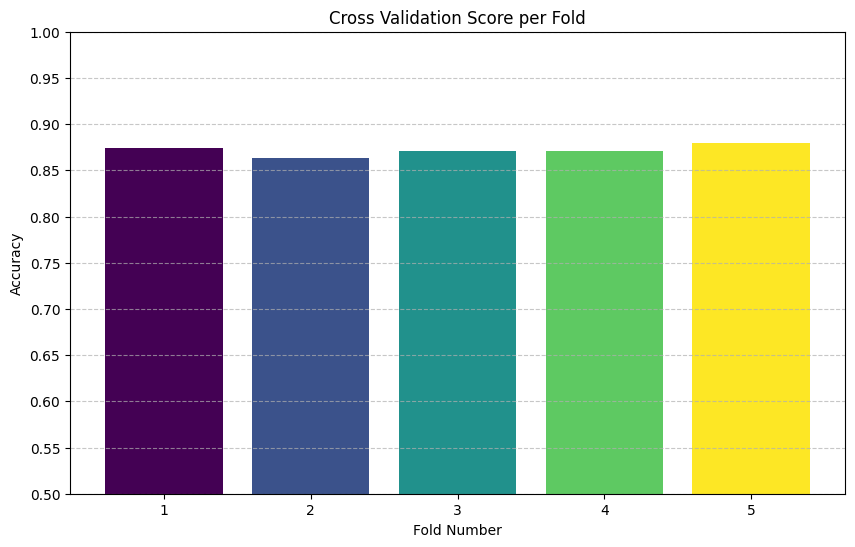

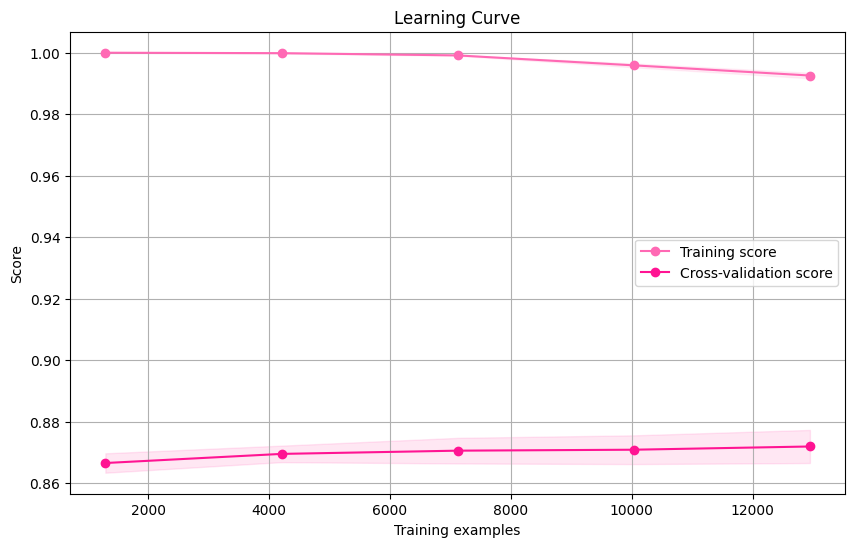

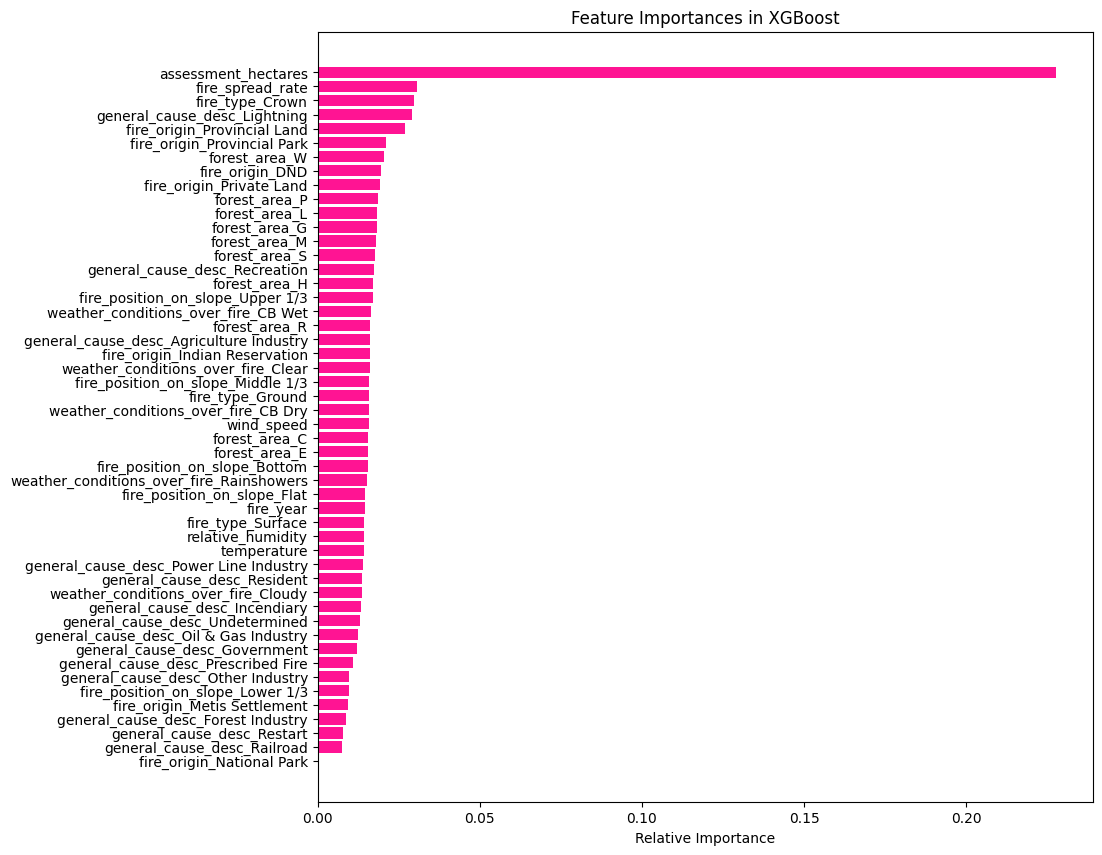

In [155]:
from xgboost import XGBClassifier


model_name = 'XGBoost'

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators = 200)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_pred_prob = xgb.predict_proba(X_test)[:, 1]

print(f'{model_name} Metrics:')
accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred)
append_metrics(model_name, accuracy, precision, recall, f1)
# plot_precision_recall_curve(y_test, y_pred_prob, model_name, 'deeppink')
print()
plot_cross_val_score(xgb, X_train, y_train)
print()
plot_learning_curve(xgb, X_train, y_train, color_train='hotpink', color_val='deeppink')
plot_feature_importance(xgb, model_name, 'deeppink')




In [156]:
filtered_wildfire_data['day_diff_from_assessment'].describe()

count    20228.000000
mean         0.552403
std          4.198394
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        190.000000
Name: day_diff_from_assessment, dtype: float64

(array([1.9955e+04, 1.3400e+02, 5.0000e+01, 3.6000e+01, 2.5000e+01,
        8.0000e+00, 8.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  0. ,   9.5,  19. ,  28.5,  38. ,  47.5,  57. ,  66.5,  76. ,
         85.5,  95. , 104.5, 114. , 123.5, 133. , 142.5, 152. , 161.5,
        171. , 180.5, 190. ]),
 <BarContainer object of 20 artists>)

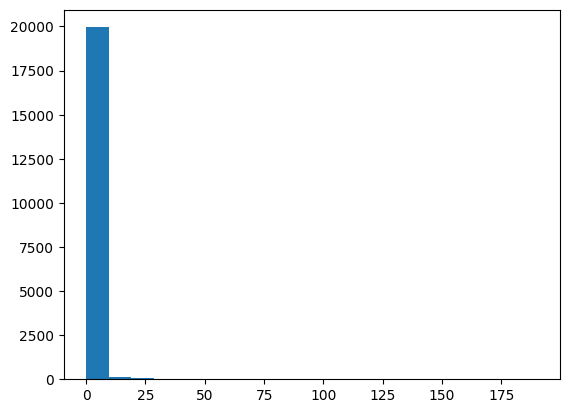

In [286]:
plt.hist(filtered_wildfire_data['day_diff_from_assessment'], bins = 20)

In [287]:
filtered_wildfire_data1 = filtered_wildfire_data[filtered_wildfire_data['day_diff_from_assessment'] > 1]

(array([829., 103.,  46.,  30.,  23.,   7.,   7.,   2.,   1.,   3.,   2.,
          0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([  2. ,  11.4,  20.8,  30.2,  39.6,  49. ,  58.4,  67.8,  77.2,
         86.6,  96. , 105.4, 114.8, 124.2, 133.6, 143. , 152.4, 161.8,
        171.2, 180.6, 190. ]),
 <BarContainer object of 20 artists>)

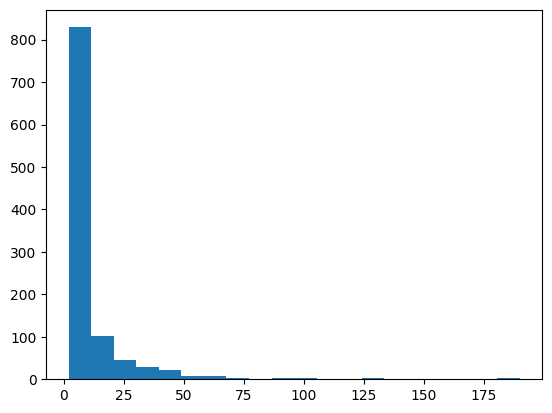

In [289]:
plt.hist(filtered_wildfire_data1['day_diff_from_assessment'], bins = 20)

In [290]:
filtered_wildfire_data1['temperature'].describe()

count    1057.000000
mean       22.216272
std         6.297264
min       -30.000000
25%        19.000000
50%        23.000000
75%        26.000000
max        39.000000
Name: temperature, dtype: float64

In [291]:
cat_list = list(filtered_wildfire_data1.dtypes[filtered_wildfire_data1.dtypes == 'object'].index)
cat_list.remove('size_class')
model_data = pd.get_dummies(filtered_wildfire_data1, columns=cat_list)


In [292]:
cols = list(filtered_wildfire_data1.dtypes.index)
print(cols)

for elem in cat_list:
  if elem in cols:
    cols.remove(elem)

cols.remove('day_diff_from_assessment')
cols.remove('size_class')

for feature in cols:
    mean = model_data[feature].mean()
    std = model_data[feature].std()
    normalize_fn = lambda x: (x - mean) / std
    model_data[feature] = model_data[feature].apply(normalize_fn)

['fire_year', 'forest_area', 'size_class', 'assessment_hectares', 'fire_origin', 'general_cause_desc', 'fire_spread_rate', 'fire_type', 'fire_position_on_slope', 'weather_conditions_over_fire', 'temperature', 'relative_humidity', 'wind_speed', 'day_diff_from_assessment']


In [293]:
linear_model_df = model_data.drop('size_class', axis = 1)

In [295]:
from sklearn.linear_model import LinearRegression

# splitting data into train/test

X = linear_model_df.drop('day_diff_from_assessment', axis = 1)
y = linear_model_df.loc[:,'day_diff_from_assessment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

reg = LinearRegression().fit(X_train, y_train)
print("R^2: ", reg.score(X, y))

y_preds = reg.predict(X_test)
print("MSE: ",mean_squared_error(y_test,y_preds))

R^2:  0.08795006521876125
MSE:  265.1728846797378


In [316]:
def fit_tree_calc_mse(data,target):
    full_data = pd.concat([data,target], join = 'inner')
    tree = DecisionTreeRegressor(max_depth=3).fit(data, target)
    target_predicted = tree.predict(data)
    mse = mean_squared_error(target, target_predicted)
    print("Train MSE: ", mse)

    return tree

In [318]:
from sklearn.tree import DecisionTreeRegressor

tree = fit_tree_calc_mse(X_train, y_train)

y_preds = tree.predict(X_test)
test_mse = mean_squared_error(y_test, y_preds)

print("Test MSE:", test_mse)


Train MSE:  200.61889144830747
Test MSE: 280.92191409908736


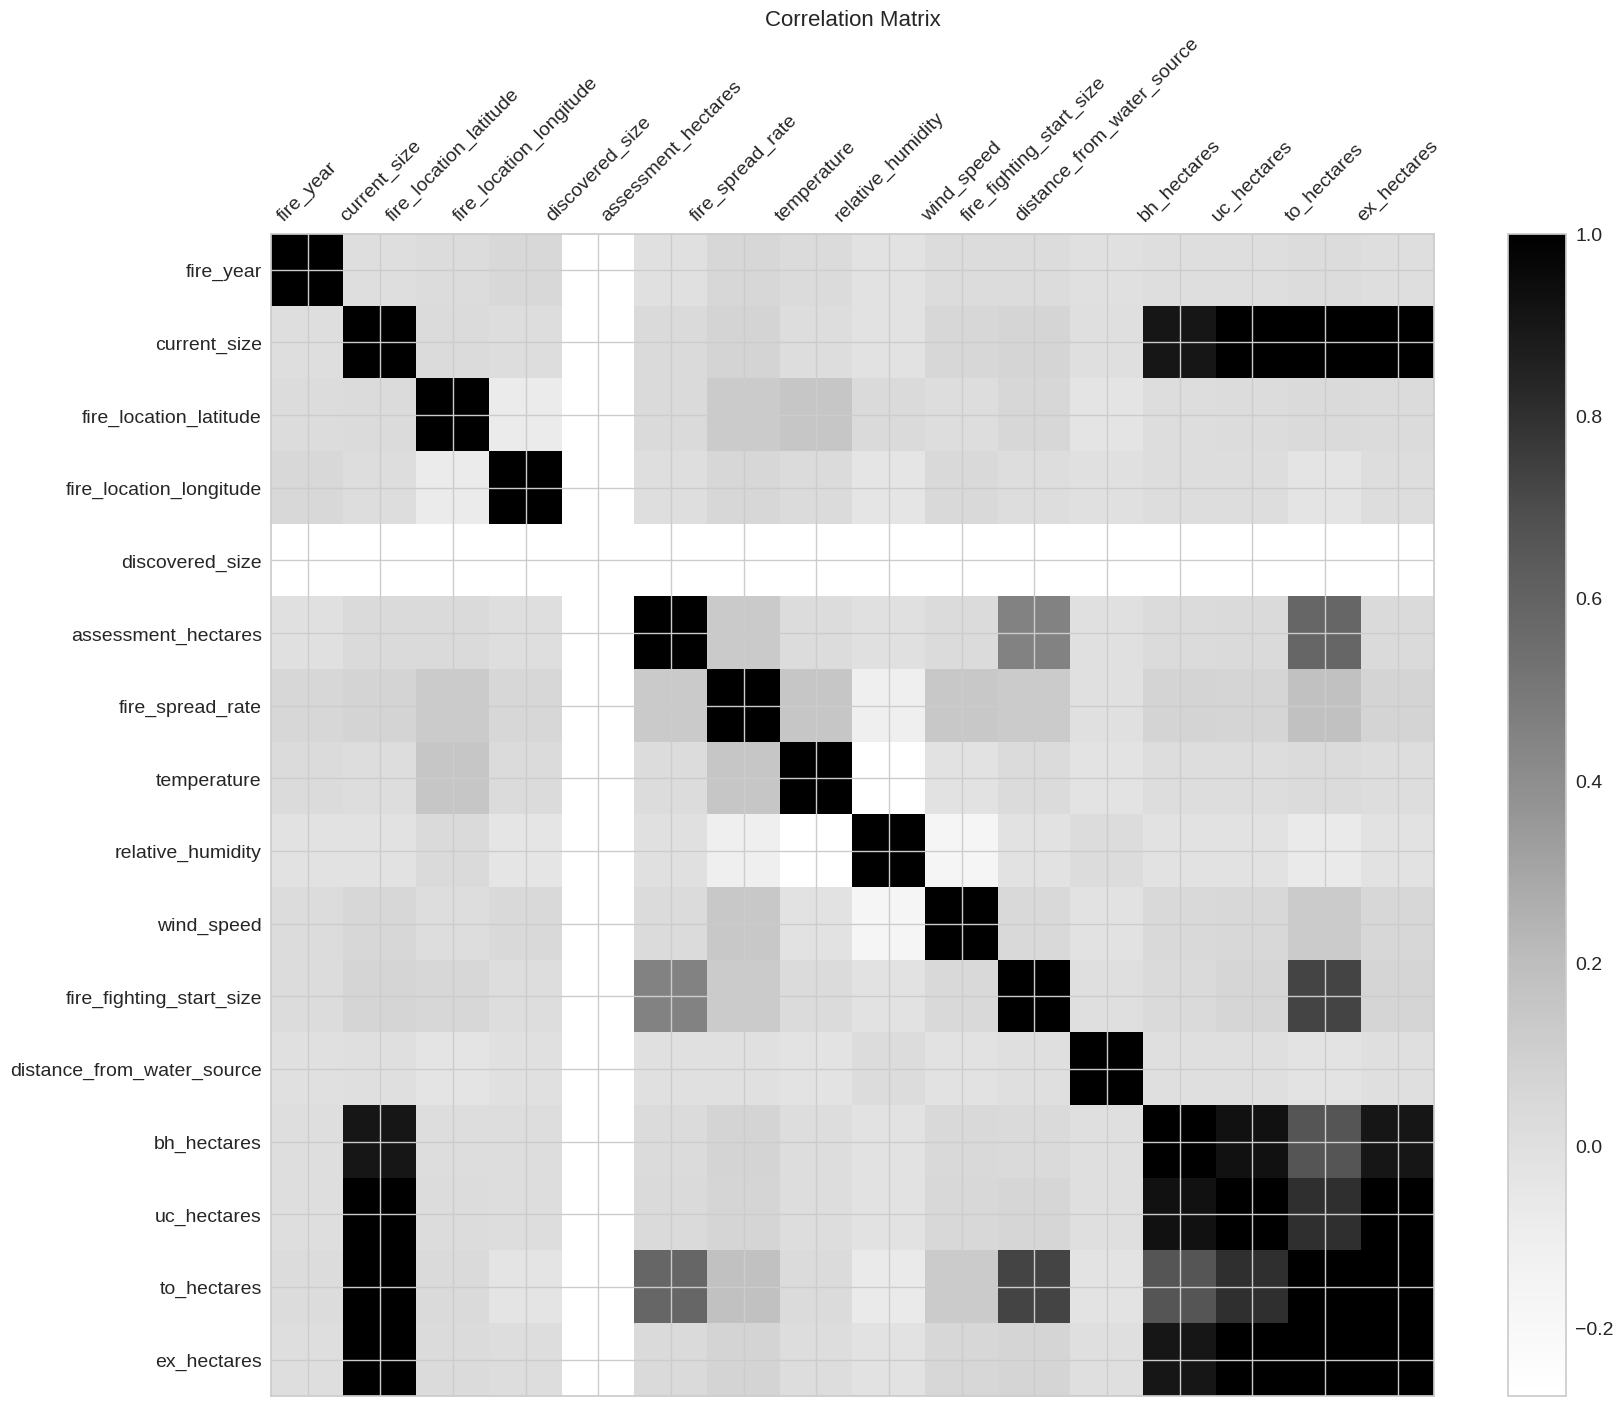

In [ ]:
`f = plt.figure(figsize=(19, 15))
plt.matshow(wildfire_data.corr(), fignum=f.number)
plt.xticks(range(wildfire_data.select_dtypes(['number']).shape[1]), wildfire_data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(wildfire_data.select_dtypes(['number']).shape[1]), wildfire_data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);